# Car price prediction using Regression modelling
Our aim is to generate useful insights from the dataset containing information about second hand cars by establishing a relationship between selling price and other attributes. For this we will develop two different machine learning models Linear Regression and Decision Tree Regression. The performance metrics of the two parameters will be judged by calculating the mean squared error (MSE), root mean squared error (RMSE), mean absolute error (MAE) and r2 score. The performance metrics of both the datasets will be  compared using hypothesis testing at a confidence interval of 95%.

In [197]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tools.eval_measures import rmse
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from scipy import stats

We will use a csv file dataset publicly available on [Kaggle](https://www.kaggle.com) scrapped from [Cardekho](https://www.cardekho.com).

The columns in the given dataset are as follows:

`Car_Name`
`Year`
`Selling_Price`
`Present_Price`
`Kms_Driven`
`Fuel_Type`
`Seller_Type`
`Transmission`
`Owner`

In [198]:
#Import the csv file in a pandas dataframe
data = pd.read_csv('car data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Initial Data Analysis and preprocessing

We will perform exploratory analysis to gain insights from data. We will determine the data types of different columns, check if any column has null values, perform outlier detection and will remove outliers using z score. We will also perform initial graphical analysis to determine the data distribution.

In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
Car_Name         301 non-null object
Year             301 non-null int64
Selling_Price    301 non-null float64
Present_Price    301 non-null float64
Kms_Driven       301 non-null int64
Fuel_Type        301 non-null object
Seller_Type      301 non-null object
Transmission     301 non-null object
Owner            301 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [200]:
#Check if there are any null values
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [201]:
print(data['Selling_Price'].describe())
print(data['Present_Price'].describe())
print(data['Kms_Driven'].describe())

count    301.000000
mean       4.661296
std        5.082812
min        0.100000
25%        0.900000
50%        3.600000
75%        6.000000
max       35.000000
Name: Selling_Price, dtype: float64
count    301.000000
mean       7.628472
std        8.644115
min        0.320000
25%        1.200000
50%        6.400000
75%        9.900000
max       92.600000
Name: Present_Price, dtype: float64
count       301.000000
mean      36947.205980
std       38886.883882
min         500.000000
25%       15000.000000
50%       32000.000000
75%       48767.000000
max      500000.000000
Name: Kms_Driven, dtype: float64


In [202]:
#Classifying the categorical attributes of the data
print(data['Owner'].value_counts())
print(data['Fuel_Type'].value_counts())
print(data['Seller_Type'].value_counts())
print(data['Transmission'].value_counts())
print(data['Year'].value_counts())

0    290
1     10
3      1
Name: Owner, dtype: int64
Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64
2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2007     2
2003     2
2018     1
2004     1
Name: Year, dtype: int64


In [203]:
data.drop(['Car_Name'],axis=1,inplace=True)

In [204]:
#Convert the categorical attributes to numerical attributes
convert_attributes = {'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2},
                      'Seller_Type':{'Dealer':0,'Individual':1},
                      'Transmission':{'Manual':0,'Automatic':1}}
data.replace(convert_attributes,inplace=True)

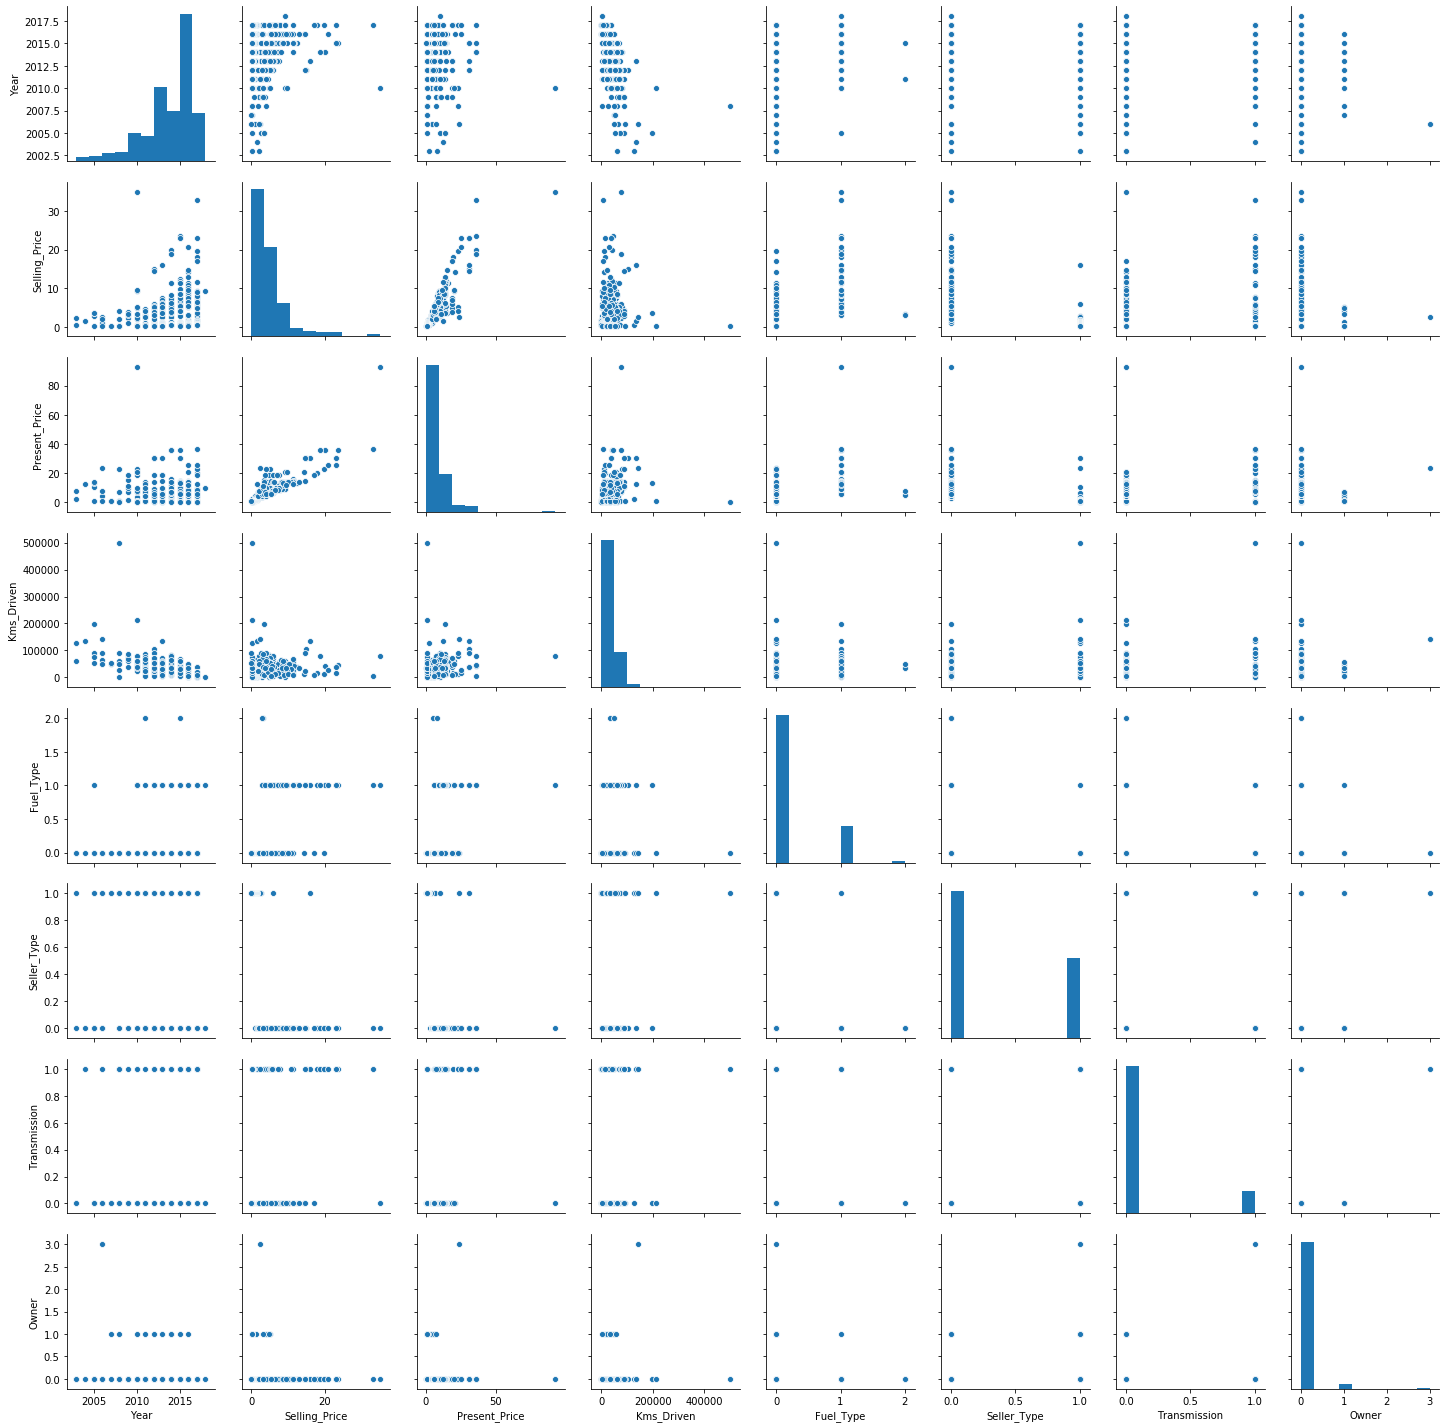

In [205]:
sns.pairplot(data)

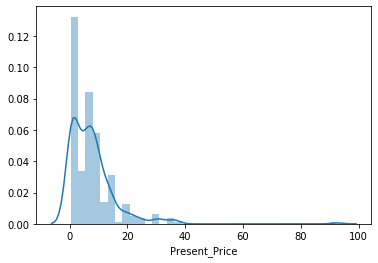

In [206]:
sns.distplot(data['Present_Price'])

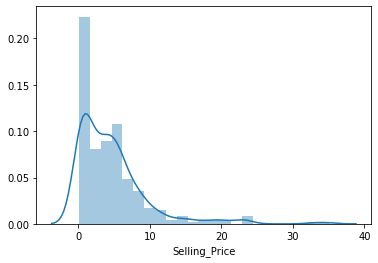

In [207]:
sns.distplot(data['Selling_Price'])

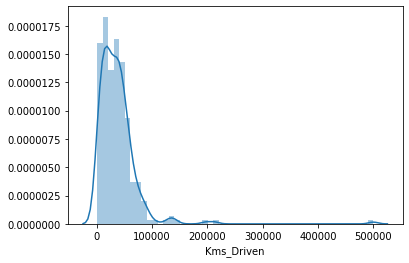

In [208]:
sns.distplot(data['Kms_Driven'])

{'whiskers': [<matplotlib.lines.Line2D at 0x226086c5ac8>,
 'caps': [<matplotlib.lines.Line2D at 0x226086c9a88>,
 'boxes': [<matplotlib.lines.Line2D at 0x226086c1f88>],
 'medians': [<matplotlib.lines.Line2D at 0x226086cca08>],
 'fliers': [<matplotlib.lines.Line2D at 0x226086ccb08>],
 'means': []}

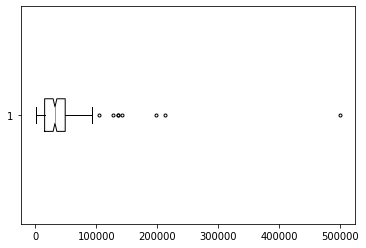

In [209]:
#Creating a boxplot to deduct outliers for Kms driven
plt.boxplot(data['Kms_Driven'], 
            vert=False, notch=True, flierprops={'marker':'.'})

{'whiskers': [<matplotlib.lines.Line2D at 0x2260872e7c8>,
 'caps': [<matplotlib.lines.Line2D at 0x2260872ee48>,
 'boxes': [<matplotlib.lines.Line2D at 0x22608728d88>],
 'medians': [<matplotlib.lines.Line2D at 0x22609702fc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x22609707e48>],
 'means': []}

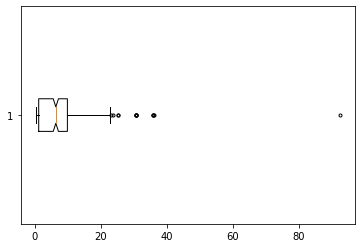

In [210]:
#Creating a boxplot to deduct outliers for Present Price
plt.boxplot(data['Present_Price'], 
            vert=False, notch=True, flierprops={'marker':'.'})

{'whiskers': [<matplotlib.lines.Line2D at 0x226097663c8>,
 'caps': [<matplotlib.lines.Line2D at 0x22609766c88>,
 'boxes': [<matplotlib.lines.Line2D at 0x22609763908>],
 'medians': [<matplotlib.lines.Line2D at 0x2260976abc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2260976fa48>],
 'means': []}

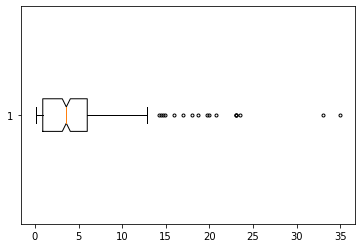

In [211]:
#Creating a boxplot to deduct outliers for Selling Price
plt.boxplot(data['Selling_Price'], 
            vert=False, notch=True, flierprops={'marker':'.'})

In [212]:
z_score = data[['Selling_Price','Present_Price','Kms_Driven']].apply(zscore)

In [213]:
for column in z_score.columns:
    for i in range(len(z_score)):
        if z_score[column][i] > 2 and i not in outliers:
            print(data.loc[i])

In [214]:
data.drop(outliers,inplace=True)

In [215]:
col = data.columns
scaler = MinMaxScaler()
scaler.fit(data)
data = pd.DataFrame(scaler.transform(data))
data.columns=col

## Regression Modelling

We will use the preprocessed data to build linear regression and decision tree models. The more suitable model will be validated with hypothesis testing at 95% confidence interval.

In [216]:
y = data['Selling_Price']

In [217]:
y.head()

0    0.222146
1    0.317840
2    0.488722
3    0.187970
4    0.307587
Name: Selling_Price, dtype: float64

In [218]:
X = data.drop(['Selling_Price'],axis=1)

In [219]:
X.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,0.733333,0.234118,0.288882,0.0,0.0,0.0,0.0
1,0.666667,0.409596,0.463301,0.5,0.0,0.0,0.0
2,0.933333,0.423367,0.069768,0.0,0.0,0.0,0.0
3,0.533333,0.170147,0.051236,0.0,0.0,0.0,0.0
4,0.733333,0.290982,0.457305,0.5,0.0,0.0,0.0


In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [221]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(187, 7)
(93, 7)
(187,)
(93,)


In [222]:
# Now let's fit a model
lm = LinearRegression()
_ = lm.fit(X_train, y_train)

print('Intercept:', lm.intercept_)
print('Coefficients:\n', lm.coef_)
print('\nR-squared for training data:', lm.score(X_train, y_train))
print('\nR-squared for test data:', lm.score(X_test, y_test))


# We can also calculate the standard error
stderr = math.sqrt(np.mean((y_train - lm.predict(X_train))**2))
print('\nStandard error:', stderr)

Intercept: -0.0971449219346574
Coefficients:
 [ 0.3061007   0.70884591 -0.10175519  0.15072765 -0.07418463  0.02742429
 -0.00980112]

R-squared for training data: 0.8650297150569056

R-squared for test data: 0.8124069220373209

Standard error: 0.0801077305351209



R-squared for training data: 0.8650297150569056

RMSE for training data: 0.08010773053512088

MSE for training data: 0.0064172484914875386

MAE for training data: 0.056918490993359015


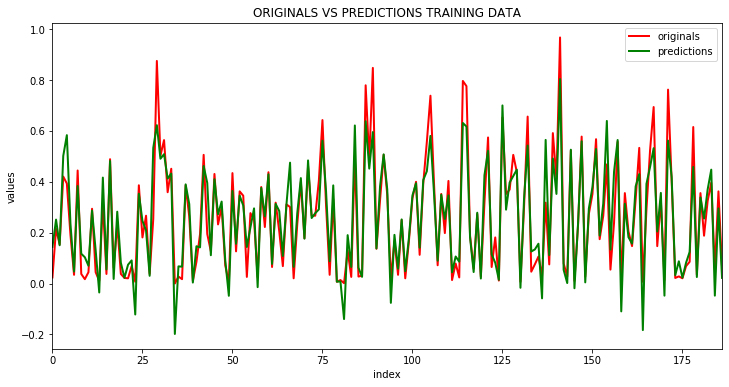

In [223]:
#Calculate error on training data
print('\nR-squared for training data:', lm.score(X_train, y_train))
predictions = lm.predict(X_train)
# Calculate root mean squared error 
print('\nRMSE for training data:', rmse(y_train, predictions))
# Calculate mean squared error 
print('\nMSE for training data:', mean_squared_error(y_train, predictions))
# Calculate mean absolute error
print('\nMAE for training data:', mean_absolute_error(y_train, predictions))

predict = pd.DataFrame(predictions)
test_index=y_train.reset_index()["Selling_Price"]
ax=test_index.plot(label="originals",figsize=(12,6),linewidth=2,color="r")
ax=predict[0].plot(label = "predictions",figsize=(12,6),linewidth=2,color="g")
plt.legend(loc='upper right')
plt.title("ORIGINALS VS PREDICTIONS TRAINING DATA")
plt.xlabel("index")
plt.ylabel("values")
plt.show()


R-squared for test data: 0.8124069220373209

RMSE for test data: 0.09291971886129965

MSE for test data: 0.008634074153262967

MAE for test data: 0.06594213767076831


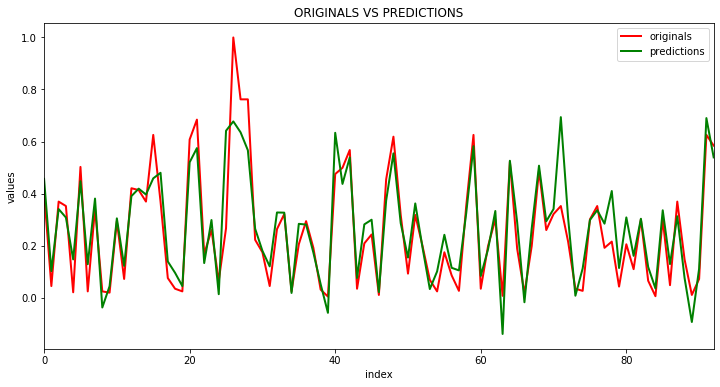

In [224]:
#Calculate error on test data
print('\nR-squared for test data:', lm.score(X_test, y_test))
predictions = lm.predict(X_test)
# Calculate root mean squared error 
print('\nRMSE for test data:', rmse(y_test, predictions))
# Calculate mean squared error 
print('\nMSE for test data:', mean_squared_error(y_test, predictions))
# Calculate mean absolute error
print('\nMAE for test data:', mean_absolute_error(y_test, predictions))

predict = pd.DataFrame(predictions)
test_index=y_test.reset_index()["Selling_Price"]
ax=test_index.plot(label="originals",figsize=(12,6),linewidth=2,color="r")
ax=predict[0].plot(label = "predictions",figsize=(12,6),linewidth=2,color="g")
plt.legend(loc='upper right')
plt.title("ORIGINALS VS PREDICTIONS")
plt.xlabel("index")
plt.ylabel("values")
plt.show()

In [225]:
param_grid = {'max_depth':[1,3,5,7],'max_features':['auto','sqrt','log2']}
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=10,
                          return_train_score=True)


grid_search.fit(X_train, y_train)

print("Test set score: {:.4f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Parameter grid:
{'max_depth': [1, 3, 5, 7], 'max_features': ['auto', 'sqrt', 'log2']}
Test set score: 0.8835
Best parameters: {'max_depth': 5, 'max_features': 'auto'}
Best cross-validation score: 0.86
Best estimator:
DecisionTreeRegressor(criterion='mse', max_depth=5, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [226]:
dt = DecisionTreeRegressor(max_depth=7,max_features='auto',random_state=42)
dt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))

Accuracy on training set: 0.984
Accuracy on test set: 0.903



R-squared for training data: 0.9843166718934891

RMSE for training data: 0.027307029535112493

MSE for training data: 0.0007456738620315059

MAE for training data: 0.013518894581175953


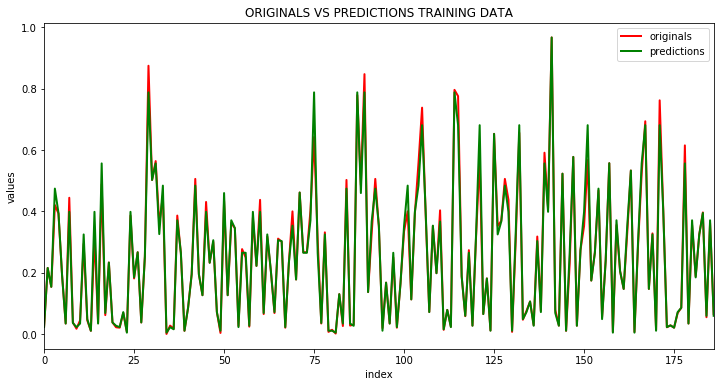

In [227]:
#Calculate error on training data
print('\nR-squared for training data:', dt.score(X_train, y_train))
predictions = dt.predict(X_train)
# Calculate root mean squared error 
print('\nRMSE for training data:', rmse(y_train, predictions))
# Calculate mean squared error 
print('\nMSE for training data:', mean_squared_error(y_train, predictions))
# Calculate mean absolute error
print('\nMAE for training data:', mean_absolute_error(y_train, predictions))

predict = pd.DataFrame(predictions)
test_index=y_train.reset_index()["Selling_Price"]
ax=test_index.plot(label="originals",figsize=(12,6),linewidth=2,color="r")
ax=predict[0].plot(label = "predictions",figsize=(12,6),linewidth=2,color="g")
plt.legend(loc='upper right')
plt.title("ORIGINALS VS PREDICTIONS TRAINING DATA")
plt.xlabel("index")
plt.ylabel("values")
plt.show()


R-squared for test data: 0.9032904026694424

RMSE for test data: 0.06671665596058714

MSE for test data: 0.0044511121825633465

MAE for test data: 0.03635608828429589


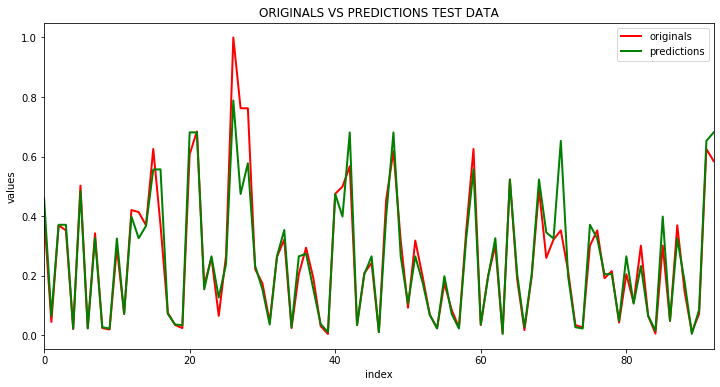

In [228]:
#Calculate error on test data
print('\nR-squared for test data:', dt.score(X_test, y_test))
predictions = dt.predict(X_test)
# Calculate root mean squared error 
print('\nRMSE for test data:', rmse(y_test, predictions))
# Calculate mean squared error 
print('\nMSE for test data:', mean_squared_error(y_test, predictions))
# Calculate mean absolute error
print('\nMAE for test data:', mean_absolute_error(y_test, predictions))
predict = pd.DataFrame(predictions)
test_index=y_test.reset_index()["Selling_Price"]
ax=test_index.plot(label="originals",figsize=(12,6),linewidth=2,color="r")
ax=predict[0].plot(label = "predictions",figsize=(12,6),linewidth=2,color="g")
plt.legend(loc='upper right')
plt.title("ORIGINALS VS PREDICTIONS TEST DATA")
plt.xlabel("index")
plt.ylabel("values")
plt.show()

In [229]:
y_actual = y_test
lg_pred = lm.predict(X_test)
dt_pred = dt.predict(X_test)

In [230]:
NUM_FOLDS = 10
Y_actual_folds = np.array_split(y_actual, NUM_FOLDS)
lg_folds = np.array_split(lg_pred, NUM_FOLDS)
dt_folds = np.array_split(dt_pred, NUM_FOLDS)

In [231]:
def score_folds(Ygf, Ysf, scorer, **kwargs):
    for Yg, Ys in zip(Ygf, Ysf):
        yield scorer(Yg, Ys, **kwargs)
        
Y_lg_score = list(score_folds(Y_actual_folds, lg_folds, r2_score))
Y_dt_score = list(score_folds(Y_actual_folds, dt_folds, r2_score))
print("Linear regression mu, sigma:", np.mean(Y_lg_score), np.std(Y_lg_score))
print("Decision Tree mu, sigma:", np.mean(Y_dt_score), np.std(Y_dt_score))

Linear regression mu, sigma: 0.7452757579396805 0.22795566287362345
Decision Tree mu, sigma: 0.8821601402402608 0.1275261458401027


In [232]:
def ttest_across_folds(Ygf, Y1f, Y2f, scorer, **kwargs):
    sys1_scores = list(score_folds(Ygf, Y1f, scorer, **kwargs))
    sys2_scores = list(score_folds(Ygf, Y2f, scorer, **kwargs))
    print("P-value for H1 sys1 (mu={:.3f}) > sys2 (mu={:.3f}) by {}:"\
          .format(np.mean(sys1_scores), np.mean(sys2_scores), scorer.__name__))
    print(stats.ttest_rel(sys1_scores, sys2_scores).pvalue*0.5)
ttest_across_folds(Y_actual_folds,lg_folds,dt_folds,r2_score)

P-value for H1 sys1 (mu=0.745) > sys2 (mu=0.882) by r2_score:
0.01255144658148542


In [196]:
ttest_across_folds(Y_actual_folds,lg_folds,dt_folds,rmse)
ttest_across_folds(Y_actual_folds,lg_folds,dt_folds,mean_absolute_error)
ttest_across_folds(Y_actual_folds,lg_folds,dt_folds,mean_squared_error)

P-value for H1 sys1 (mu=0.083) > sys2 (mu=0.056) by rmse:
0.0003728069442127809
P-value for H1 sys1 (mu=0.065) > sys2 (mu=0.036) by mean_absolute_error:
3.275779263778586e-05
P-value for H1 sys1 (mu=0.008) > sys2 (mu=0.004) by mean_squared_error:
0.007717682563195211
